# Basic Convolutional Neural Network
***Honors Project by Peyton Warren***

This neural net uses the MNIST dataset with the listed layers:
1. Convolutional layer
2. Max Pooling layer
3. Fully Connected layer

In [30]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import Callback

import matplotlib.pylab as plt

(60000, 28, 28, 1)
(60000, 10)


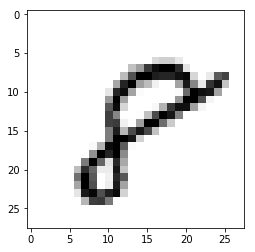

In [31]:
# Data setup
# Download mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# creating the image dimension variables and the number of channels
img_x, img_y = x_train.shape[1], x_train.shape[2]
channels = 1

plt.imshow(x_train[59999], cmap=plt.cm.binary)

# Reshape into 4D tensor with tensorflow reshape function
# Putting it into the format "channels_last" data format (batch, cols, rows, channels)
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, channels)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, channels)

# change data type to floating point numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data, x_train & x_test now between 0 and 1
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# print(type(x_train))    # x_train is a numpy.ndarray object
print(x_train.shape)
print(y_train.shape)

In [32]:
# Settings for training the model later on
batch_size = 128    # 128 items in the training data are being used
num_classes = 10    # Number of classifications
epochs = 10         # performing 10 epochs
input_shape = (img_x, img_y, channels)

In [33]:
model = Sequential()

In [34]:
# Adds layers

# Convolutional Layer
model.add(Conv2D(32, kernel_size = (5, 5), strides = (1, 1), # (5, 1),
                 activation='relu',
                 input_shape=input_shape))

# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(num_classes))

In [35]:
# Optimizer: Stochastic Gradient Descent
sgd = SGD(lr=0.0001)

# Compile follows setting up the neural network
model.compile(optimizer=sgd,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
class AccuracyHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

In [37]:
model.fit(x_train, y_train,      # inputing the training x and y
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,             # verbose 1 means it has a progress bar for every epoch
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 301us/step - loss: 6.8773 - acc: 0.1748 - val_loss: 7.7063 - val_acc: 0.1952
Epoch 2/10
60000/60000 [==============================] - 18s 305us/step - loss: 7.6790 - acc: 0.1865 - val_loss: 7.5963 - val_acc: 0.1948
Epoch 3/10
60000/60000 [==============================] - 18s 306us/step - loss: 8.0769 - acc: 0.1878 - val_loss: 8.1943 - val_acc: 0.1963
Epoch 4/10
60000/60000 [==============================] - 18s 304us/step - loss: 8.4686 - acc: 0.1893 - val_loss: 8.6099 - val_acc: 0.1986
Epoch 5/10
60000/60000 [==============================] - 18s 304us/step - loss: 8.7671 - acc: 0.1898 - val_loss: 8.8425 - val_acc: 0.1998
Epoch 6/10
60000/60000 [==============================] - 18s 306us/step - loss: 8.9917 - acc: 0.1893 - val_loss: 9.1008 - val_acc: 0.1996
Epoch 7/10
60000/60000 [==============================] - 18s 308us/step - loss: 8.9226 - acc: 0.1920 - val_loss: 8.

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)

In [41]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 8.23757339401245
Test accuracy: 0.0892


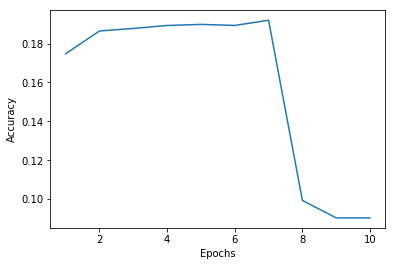

In [42]:
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()